In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px 
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/kaggle/input/world-happiness-report-2024-yearly-updated/World-happiness-report-2024.csv')

In [3]:
# Boş Veri Kontrolü
print(df.isnull().sum())

Country name                    0
Regional indicator              0
Ladder score                    0
upperwhisker                    0
lowerwhisker                    0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


In [4]:
# Boş veriler Temizlendi ve Tekrardan Yazdırıldı
df.dropna(inplace=True)
print(df.isnull().sum())

Country name                    0
Regional indicator              0
Ladder score                    0
upperwhisker                    0
lowerwhisker                    0
Log GDP per capita              0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
Dystopia + residual             0
dtype: int64


In [5]:
# Veri Tipi Kontrolü
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140 entries, 0 to 142
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  140 non-null    object 
 1   Regional indicator            140 non-null    object 
 2   Ladder score                  140 non-null    float64
 3   upperwhisker                  140 non-null    float64
 4   lowerwhisker                  140 non-null    float64
 5   Log GDP per capita            140 non-null    float64
 6   Social support                140 non-null    float64
 7   Healthy life expectancy       140 non-null    float64
 8   Freedom to make life choices  140 non-null    float64
 9   Generosity                    140 non-null    float64
 10  Perceptions of corruption     140 non-null    float64
 11  Dystopia + residual           140 non-null    float64
dtypes: float64(10), object(2)
memory usage: 14.2+ KB


In [6]:
# Tekrar Sayısı Kontrolü
tekrar_sayisi = df.duplicated().sum()
print(f"Tekrar eden satır sayısı: {tekrar_sayisi}")

Tekrar eden satır sayısı: 0


In [7]:
# Mnatıksız Değer Kontrolü
print(df.describe())

       Ladder score  upperwhisker  lowerwhisker  Log GDP per capita  \
count    140.000000    140.000000    140.000000          140.000000   
mean       5.530893      5.644057      5.417700            1.378807   
std        1.181247      1.165108      1.198051            0.425098   
min        1.721000      1.775000      1.667000            0.000000   
25%        4.631750      4.762250      4.503750            1.077750   
50%        5.800500      5.911000      5.676500            1.431500   
75%        6.426250      6.515250      6.338250            1.741500   
max        7.741000      7.815000      7.667000            2.141000   

       Social support  Healthy life expectancy  Freedom to make life choices  \
count      140.000000               140.000000                    140.000000   
mean         1.134329                 0.520886                      0.620621   
std          0.333317                 0.164923                      0.162492   
min          0.000000                 0.

In [8]:
print(df.columns)

Index(['Country name', 'Regional indicator', 'Ladder score', 'upperwhisker',
       'lowerwhisker', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Dystopia + residual'],
      dtype='object')


In [9]:
# Sutun İsimlerini Düzeltelim
df.rename(columns={
    'Country name':'Country',
    'Regional indicator':'Region',
    'Ladder score':'Happiness_Score',
    'Log GDP per capita': 'GDP_per_Capita',
    'Social support': 'Social_Support',
    'Healthy life expectancy': 'Life_Expectancy',
    'Freedom to make life choices': 'Freedom',
    'Generosity': 'Generosity',
    'Perceptions of corruption': 'Corruption'
    
}, inplace=True
         )
# Gerekli Sutunları Sınıflama
df=df[['Country', 'Region', 'Happiness_Score', 'GDP_per_Capita', 
         'Social_Support', 'Life_Expectancy', 'Freedom', 'Generosity', 'Corruption']]
df.head()

,Country,Region,Happiness_Score,GDP_per_Capita,Social_Support,Life_Expectancy,Freedom,Generosity,Corruption
0,Finland,Western Europe,7.741,1.844,1.572,0.695,0.859,0.142,0.546
1,Denmark,Western Europe,7.583,1.908,1.520,0.699,0.823,0.204,0.548
2,Iceland,Western Europe,7.525,1.881,1.617,0.718,0.819,0.258,0.182
3,Sweden,Western Europe,7.344,1.878,1.501,0.724,0.838,0.221,0.524
4,Israel,Middle East and North Africa,7.341,1.803,1.513,0.740,0.641,0.153,0.193


In [10]:
# Dünya Geneli Analiz
fig=px.choropleth(df,
                 locations="Country",
                  locationmode="country names",
                  color="Happiness_Score",
                  hover_name="Country",
                  color_continuous_scale="Viridis",
                  title="2024 Dünya Mutluluk Haritası"
                 )
fig.update_layout(height=500)
fig.show()

In [11]:
# Veri Analizi
top_10 =df.sort_values(by='Happiness_Score',ascending=False).head(10)
bottom_10=df.sort_values(by='Happiness_Score',ascending=True).head(10)

# En Mutlu İlk 10 Ülke
fig_ilk_10=px.bar(top_10,
                   x='Happiness_Score',
                   y='Country',
                   orientation='h',
                   title="En Mutlu İlk 10 Ülke (2024)",
                    color_continuous_scale='Bluy1',
                    text='Happiness_Score'   
                 )
fig_ilk_10.update_layout(yaxis={'categoryorder':'total ascending'})
fig_ilk_10.show()

In [12]:
# EnMutsuz 10 Ülke
fig_son_10=px.bar(bottom_10,
                 x='Happiness_Score', 
                y='Country', 
                orientation='h',
                title="En Mutsuz 10 Ülke (2024)",
                color='Happiness_Score',
                color_continuous_scale='Redor', 
                text='Happiness_Score')

fig_son_10.update_layout(yaxis={'categoryorder':'total descending'})
fig_son_10.show()

In [13]:
# Bölgelere Göre Mutluluk Dağılımı
region_stats = df.groupby('Region')['Happiness_Score'].mean().sort_values(ascending=False).reset_index()

fig_bolgeler = px.bar(region_stats, 
              x='Happiness_Score', 
              y='Region', 
              orientation='h',
              color='Happiness_Score',
              color_continuous_scale='Portland',
              title='Coğrafi Bölgelere Göre Mutluluk Ortalamaları',
              text_auto='.2f') 

fig_bolgeler.update_layout(xaxis_title="Ortalama Puan", yaxis_title="")
fig_bolgeler.show()

In [14]:
# Ekonomik Güç(GDP) ve Mutluluk 
fig=px.scatter(df,
              x="GDP_per_Capita",
               y="Happiness_Score",
               color="Region",
               size="Happiness_Score",
               hover_name="Country",
               trendline="ols",
               title="Ekonomik Güç ve Mutluluk İlikisi",
               template="plotly_white"
              )
fig.show()

In [15]:
# Özgürlük ve Mutluluk
fig= px.scatter(df,
               x="Freedom",
                y="Happiness_Score",
                color="Region",
                hover_name="Country",
                trendline="ols",
                title="Özgürlük ve Mutluluk İlişkisi",
                template="plotly_white"
               )
fig.show()

In [16]:
# Sağlık ve Mutluluk
fig =px.scatter(

    df,
    x="Life_Expectancy",
    y="Happiness_Score",
    color="Region",
    hover_name="Country",
    trendline="ols",
    title="Sağlıklı Yaşam Beklentisi ve MMutluluk İlişkisi",
    template="plotly_white"

)
fig.show()

In [17]:
# Korolasyon Analizi
numeric_df=df.select_dtypes(include=[np.number])
corr_matrix= numeric_df.corr()

fig=px.imshow(corr_matrix,
             text_auto=True,
             aspect="auto",
             color_continuous_scale='RdBu_r',
             title="Faktörler Arası Korolasyon İlişkisi")
fig.show()


In [18]:
fig = px.scatter_3d(df, 
                    x='GDP_per_Capita',      
                     y='Life_Expectancy',     
                     z='Happiness_Score',     
                     color='Region',          
                     hover_name='Country',    
                     opacity=0.7,             
                     size_max=10,             
                     title='3D Analiz: Ekonomi, Sağlık ve Mutluluk İlişkisi (Döndürülebilir)',
                     template='plotly_white'
                   )


fig.update_layout(margin=dict(l=0, r=0, b=0, t=30))

fig.show()

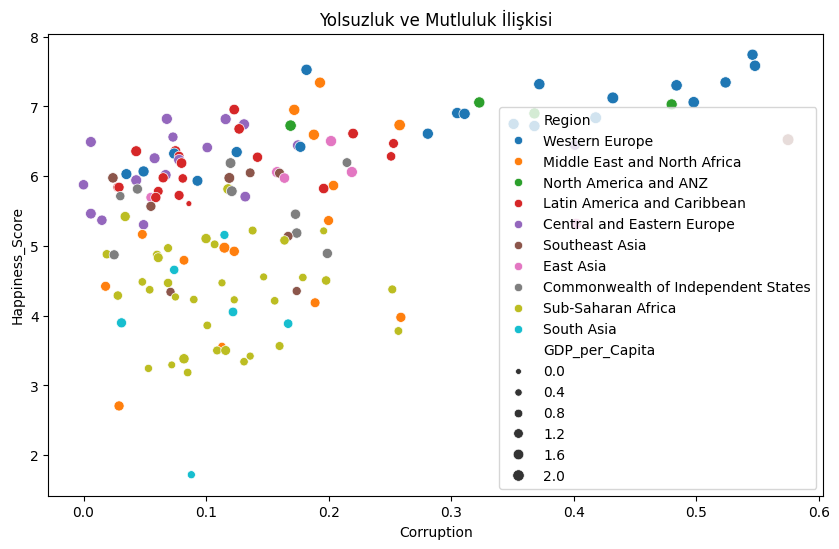

In [19]:
plt.figure(figsize=(10, 6))


sns.scatterplot(data=df, 
                x='Corruption', 
                y='Happiness_Score', 
                hue='Region',           
                size='GDP_per_Capita')  


plt.title('Yolsuzluk ve Mutluluk İlişkisi')
plt.show()